### Stemming:
A process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as lemma. Imp in NLU & NLP.

Example:
- Lets say we have a classification problem, to know whether the comments on the product is positive or negative.
- Now under the reviews section we have a review containing eating, eats, eat, eaten so "eat" is the stem word or the root word 
- we need not have these many features as an input, each and every word represents a vector


In [4]:
words = ["eating","eats","eaten","writing","writes","programming","programs","history","finally","finalize"]

In [5]:
## Porter Stemmer:
from nltk.stem import PorterStemmer 

stemmer = PorterStemmer()

# sometimes stemming may result into wrong words, like "history" -> "histori"
for word in words:
    print(word," ---> ",stemmer.stem(word))

# another example
print()
print(stemmer.stem("congratulations"))

eating  --->  eat
eats  --->  eat
eaten  --->  eaten
writing  --->  write
writes  --->  write
programming  --->  program
programs  --->  program
history  --->  histori
finally  --->  final
finalize  --->  final

congratul


### Regexp Stemmer Class:

We can implement Regular Expression Stemmer algorithms. It basically takes a single regular expression and removes any prefix or suffix that matches the expression.

In [6]:
from nltk.stem import RegexpStemmer 

# regexp: any Substring that match the regular expression will be removed 
# min: minimum number of characters 
regStemmer = RegexpStemmer('ing$|s$|e$|able$',min=4)
regStemmer1 = RegexpStemmer('ing',min=4)

print(regStemmer.stem('eating'))
print(regStemmer.stem('ingeating'))
print(regStemmer1.stem('ingeating'))


eat
ingeat
eat


### Snowball Stemmer:

In [7]:
from nltk.stem import SnowballStemmer

sbStemmer = SnowballStemmer('english')

for w in words:
    print(w," ---> ",sbStemmer.stem(w))

# comparision between Porter Stemmer & Snowball Stemmer
print()
print(stemmer.stem("fairly"),stemmer.stem("sportingly"))
print(sbStemmer.stem("fairly"),sbStemmer.stem("sportingly"))

eating  --->  eat
eats  --->  eat
eaten  --->  eaten
writing  --->  write
writes  --->  write
programming  --->  program
programs  --->  program
history  --->  histori
finally  --->  final
finalize  --->  final

fairli sportingli
fair sport


### Lemmatizer:

### Wordnet Lemmatizer
Its a technique like stemming, the word after we lemmatize is called "lemma", which is the ROOT WORD rather than root stem (output of stemming). Great improvement as it recognizes all dictionary words.

NLTK provides WordNetLemmatizer class which is a thin wrapper around the wordnet corpus. This class uses morphy() function to the WordNet CorpusReader class to find lemma.

Takes a lot of time to execute as it takes wordnet corpus.

Used in Q&A, ChatBot, text summarization

In [8]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Nitin
[nltk_data]     Flavier\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from nltk.stem import WordNetLemmatizer 

'''
Noun - n (names a person, place, thing etc)
Verb - v
adverb - r (modifies a verb eg finally, quickly)
adjective - a (describes noun)
'''
lemma = WordNetLemmatizer()

# post tag 'n': the word i am passing will be treated as a noun 
print(lemma.lemmatize("going",pos='n'))
print(lemma.lemmatize("going",pos='v'))
print(lemma.lemmatize("going",pos='a'))
print(lemma.lemmatize("going",pos='r'))

going
go
going
going


In [10]:
for w in words:
    print(w," ---> ",lemma.lemmatize(w,pos='v'))

eating  --->  eat
eats  --->  eat
eaten  --->  eat
writing  --->  write
writes  --->  write
programming  --->  program
programs  --->  program
history  --->  history
finally  --->  finally
finalize  --->  finalize


### StopWords

Stopwords are common words in a language that are often filtered out in text processing because they carry little semantic meaning. These words are frequently used but do not contribute significantly to the meaning of the text.

Helps in text simplification, and focus on meaningful words.

Articles: [a, an, the]  
Conjunctions: [and, or, but, if]  
Prepositions: [in, on, at, by, with, about, under, over]  
Pronouns: [I, you, he, she, it, we, they]  
Auxiliary Verbs: [is, are, was, were, be, been, am]  
Other Common Words: [of, for, to, from, up, down, out, very]  


In [11]:
## Speech Of DR APJ Abdul Kalam
paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [12]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Nitin
[nltk_data]     Flavier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 

stop_words = stopwords.words('english')

In [14]:
stemmer = PorterStemmer()

# tokenize my para:
documents = nltk.sent_tokenize(paragraph)

n = len(documents)

for i in range(n):
    words = nltk.word_tokenize(documents[i])
    words = [stemmer.stem(word) for word in words if word not in set(stop_words)]
    documents[i] = ' '.join(words)
print(documents)


['i three vision india .', 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .', 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .', 'yet done nation .', 'we conquer anyon .', 'we grab land , cultur , histori tri enforc way life .', 'whi ?', 'becaus respect freedom others.that first vision freedom .', 'i believ india got first vision 1857 , start war independ .', 'it freedom must protect nurtur build .', 'if free , one respect us .', 'my second vision india ’ develop .', 'for fifti year develop nation .', 'it time see develop nation .', 'we among top 5 nation world term gdp .', 'we 10 percent growth rate area .', 'our poverti level fall .', 'our achiev global recognis today .', 'yet lack self-confid see develop nation , self-reli self-assur .', 'isn ’ incorrect ?', 'i third vision .', 'india must stand world .', 'becaus i believ unless india stand world , one respect us .', 'onli strength respect stre

In [15]:
# using snowball stemmer

from nltk.stem import SnowballStemmer

sbStemmer = SnowballStemmer('english')
documents = nltk.sent_tokenize(paragraph)

n = len(documents)

for i in range(n):
    words = nltk.word_tokenize(documents[i])
    words = [sbStemmer.stem(w) for w in words if w not in stop_words]
    documents[i] = ' '.join(words)

print(documents)


['i three vision india .', 'in 3000 year histori , peopl world come invad us , captur land , conquer mind .', 'from alexand onward , greek , turk , mogul , portugues , british , french , dutch , came loot us , took .', 'yet done nation .', 'we conquer anyon .', 'we grab land , cultur , histori tri enforc way life .', 'whi ?', 'becaus respect freedom others.that first vision freedom .', 'i believ india got first vision 1857 , start war independ .', 'it freedom must protect nurtur build .', 'if free , one respect us .', 'my second vision india ’ develop .', 'for fifti year develop nation .', 'it time see develop nation .', 'we among top 5 nation world term gdp .', 'we 10 percent growth rate area .', 'our poverti level fall .', 'our achiev global recognis today .', 'yet lack self-confid see develop nation , self-reli self-assur .', 'isn ’ incorrect ?', 'i third vision .', 'india must stand world .', 'becaus i believ unless india stand world , one respect us .', 'onli strength respect stre

In [16]:
# lemmatization
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
documents = nltk.sent_tokenize(paragraph)

n = len(documents)

for i in range(n):
    words = nltk.word_tokenize(documents[i])
    words = [lemmatizer.lemmatize(w,pos='v') for w in words if w not in stop_words]
    documents[i] = ' '.join(words)

print(documents)



['I three visions India .', 'In 3000 years history , people world come invade us , capture land , conquer mind .', 'From Alexander onwards , Greeks , Turks , Moguls , Portuguese , British , French , Dutch , come loot us , take .', 'Yet do nation .', 'We conquer anyone .', 'We grab land , culture , history try enforce way life .', 'Why ?', 'Because respect freedom others.That first vision freedom .', 'I believe India get first vision 1857 , start War Independence .', 'It freedom must protect nurture build .', 'If free , one respect us .', 'My second vision India ’ development .', 'For fifty years develop nation .', 'It time see develop nation .', 'We among top 5 nations world term GDP .', 'We 10 percent growth rate areas .', 'Our poverty level fall .', 'Our achievements globally recognise today .', 'Yet lack self-confidence see develop nation , self-reliant self-assured .', 'Isn ’ incorrect ?', 'I third vision .', 'India must stand world .', 'Because I believe unless India stand world ,

### Parts of Speech Tag:

In [18]:
documents = nltk.sent_tokenize(paragraph)
print(documents)

['I have three visions for India.', 'In 3000 years of our history, people from all over \n               the world have come and invaded us, captured our lands, conquered our minds.', 'From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,\n               the French, the Dutch, all of them came and looted us, took over what was ours.', 'Yet we have not done this to any other nation.', 'We have not conquered anyone.', 'We have not grabbed their land, their culture, \n               their history and tried to enforce our way of life on them.', 'Why?', 'Because we respect the freedom of others.That is why my \n               first vision is that of freedom.', 'I believe that India got its first vision of \n               this in 1857, when we started the War of Independence.', 'It is this freedom that\n               we must protect and nurture and build on.', 'If we are not free, no one will respect us.', 'My second vision for India’s development.', 'For 

In [20]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Nitin Flavier\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [22]:
# we will find the pos tag 

for sentence in documents:
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if w not in stop_words]
    print(words)
    pos_tag = nltk.pos_tag(words)
    print(pos_tag)

['I', 'three', 'visions', 'India', '.']
[('I', 'PRP'), ('three', 'CD'), ('visions', 'NNS'), ('India', 'NNP'), ('.', '.')]
['In', '3000', 'years', 'history', ',', 'people', 'world', 'come', 'invaded', 'us', ',', 'captured', 'lands', ',', 'conquered', 'minds', '.']
[('In', 'IN'), ('3000', 'CD'), ('years', 'NNS'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('us', 'PRP'), (',', ','), ('captured', 'VBD'), ('lands', 'NNS'), (',', ','), ('conquered', 'VBD'), ('minds', 'NNS'), ('.', '.')]
['From', 'Alexander', 'onwards', ',', 'Greeks', ',', 'Turks', ',', 'Moguls', ',', 'Portuguese', ',', 'British', ',', 'French', ',', 'Dutch', ',', 'came', 'looted', 'us', ',', 'took', '.']
[('From', 'IN'), ('Alexander', 'NNP'), ('onwards', 'NNS'), (',', ','), ('Greeks', 'NNP'), (',', ','), ('Turks', 'NNP'), (',', ','), ('Moguls', 'NNP'), (',', ','), ('Portuguese', 'NNP'), (',', ','), ('British', 'NNP'), (',', ','), ('French', 'NNP'), (',', ','), ('Du

In [23]:
data = "Taj Mahal is one of the seven wonders on earth".split(" ")

nltk.pos_tag(data)

[('Taj', 'NNP'),
 ('Mahal', 'NNP'),
 ('is', 'VBZ'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('seven', 'CD'),
 ('wonders', 'NNS'),
 ('on', 'IN'),
 ('earth', 'NN')]

### Name Entity Recognition

In [29]:
sentence = "The Eiffel Tower was built from 1887 to 1889 by french engineer gustav eiffel, he had a networth of 1 million euro and his company has 20% stake in france steel and metal Co."

"""
Person: Gustav eiffel
Place: France 
Date: 1887, 1889
Money: 1 million euro
Organization: Steel & Metal Co.
Percent: 80%
"""
print(sentence)

The Eiffel Tower was built from 1887 to 1889 by french engineer gustav eiffel, he had a networth of 1 million euro and his company has 20% stake in france steel and metal Co.


In [30]:
import nltk 
words = nltk.word_tokenize(sentence)
pos_tagged = nltk.pos_tag(words)
print(words)
print(pos_tagged)

['The', 'Eiffel', 'Tower', 'was', 'built', 'from', '1887', 'to', '1889', 'by', 'french', 'engineer', 'gustav', 'eiffel', ',', 'he', 'had', 'a', 'networth', 'of', '1', 'million', 'euro', 'and', 'his', 'company', 'has', '20', '%', 'stake', 'in', 'france', 'steel', 'and', 'metal', 'Co', '.']
[('The', 'DT'), ('Eiffel', 'NNP'), ('Tower', 'NNP'), ('was', 'VBD'), ('built', 'VBN'), ('from', 'IN'), ('1887', 'CD'), ('to', 'TO'), ('1889', 'CD'), ('by', 'IN'), ('french', 'JJ'), ('engineer', 'NN'), ('gustav', 'NN'), ('eiffel', 'NN'), (',', ','), ('he', 'PRP'), ('had', 'VBD'), ('a', 'DT'), ('networth', 'NN'), ('of', 'IN'), ('1', 'CD'), ('million', 'CD'), ('euro', 'NN'), ('and', 'CC'), ('his', 'PRP$'), ('company', 'NN'), ('has', 'VBZ'), ('20', 'CD'), ('%', 'NN'), ('stake', 'NN'), ('in', 'IN'), ('france', 'NN'), ('steel', 'NN'), ('and', 'CC'), ('metal', 'NN'), ('Co', 'NNP'), ('.', '.')]


In [32]:
import nltk
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\Nitin Flavier\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker_tab.zip.


True

In [44]:
pip install numpy svgling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Nitin
[nltk_data]     Flavier\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

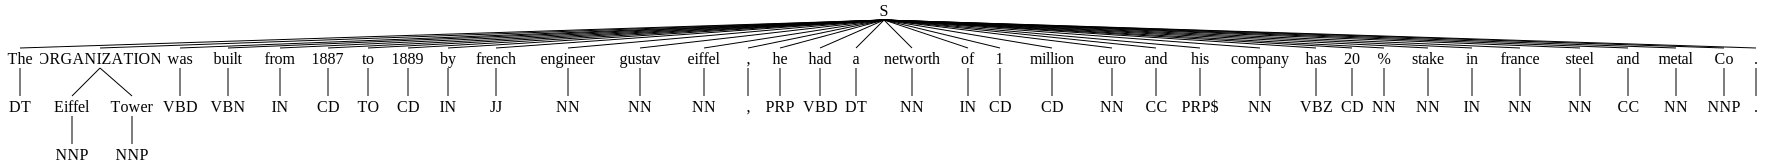

In [45]:
# Trying to give name entity recognition 

nltk.ne_chunk(pos_tagged)